# Lab3-Basic Learning Algorithms - Section5: Assignment (30 pts - 15Mandatory/15 Optional)


## Task A.3.1: Handwriting Recognition (8 points- Mandatory)

### The MNIST dataset:

MNIST is a large database of **_handwritten digits_** that is commonly used for training various image processing systems.

The database is also widely used for **_training and testing in the field of machine learning._** This dataset contains **_6000 images for training_** and **_10000 images for testing_** the out-of-sample performance. Here, let's use the **_simple algorithms_** in this lab to build a handwriting model!

Go to the [following link](https://machinelearningmastery.com/building-a-logistic-regression-classifier-in-pytorch/), describing how to import the MNIST dataset and code a logistic regression algorithm for handwriting recognition.

- Import the MNIST dataset.

  1. Classify the hand-written numbers in 10 output classes (0-9) (5 pts-Mandatory), using:
     1. **_Linear Regression_**
     2. **_SVM_** (with Linear kernel)
     3. **_Random Forest_** (with a maximum depth of your choice)
  2. Visualize the MSE error against Epoch for 3 algorithms in one line plot, with different colors for each algorithm. A legend should be on the top corner ("SVM", "LR", "RF") (3 pts-Mandatory)


number of training samples: 60000
number of testing samples: 10000
datatype of the 1st training sample:  torch.FloatTensor
size of the 1st training sample:  torch.Size([1, 28, 28])
label of the first taining sample:  5
label of the second taining sample:  0


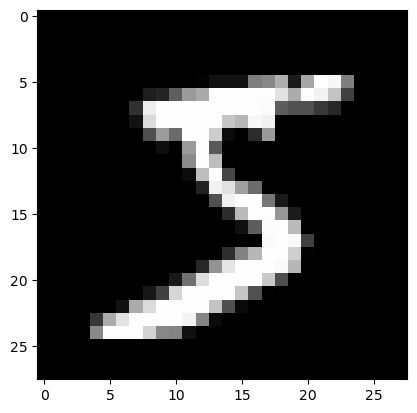

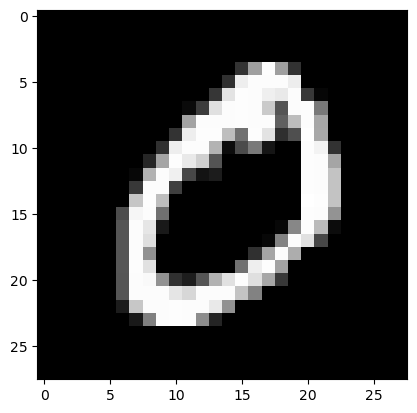

Epoch: 1. Loss: 2.1707353591918945. Accuracy: 61.92
Epoch: 2. Loss: 2.089451789855957. Accuracy: 73.15
Epoch: 3. Loss: 2.069373369216919. Accuracy: 76.87
Epoch: 4. Loss: 2.000169515609741. Accuracy: 78.59
Epoch: 5. Loss: 1.9436835050582886. Accuracy: 79.63
Epoch: 6. Loss: 1.941719889640808. Accuracy: 80.42
Epoch: 7. Loss: 1.8683491945266724. Accuracy: 81.1
Epoch: 8. Loss: 1.8485807180404663. Accuracy: 81.65
Epoch: 9. Loss: 1.8719457387924194. Accuracy: 81.92
Epoch: 10. Loss: 1.8735599517822266. Accuracy: 82.34


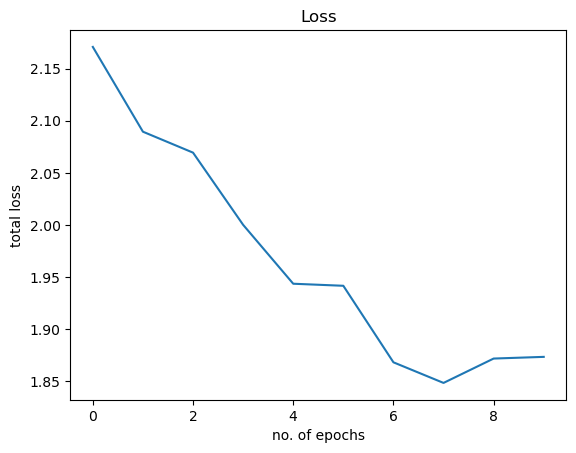

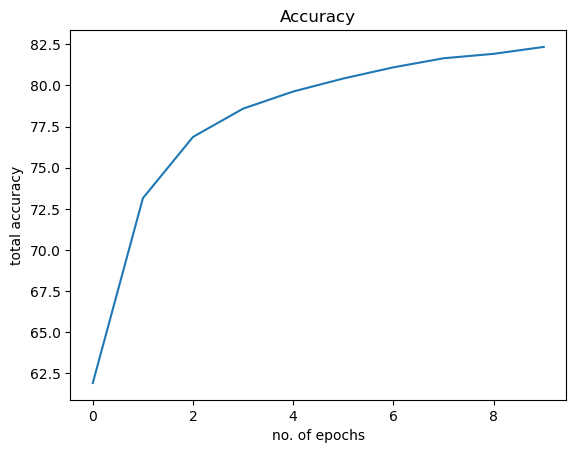

In [35]:
"""
Copy from: https://machinelearningmastery.com/building-a-logistic-regression-classifier-in-pytorch/
"""

import torch
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# loading training data
train_dataset = datasets.MNIST(
    root="./data", train=True, transform=transforms.ToTensor(), download=True
)
# loading test data
test_dataset = datasets.MNIST(
    root="./data", train=False, transform=transforms.ToTensor()
)

print(
    "number of training samples: "
    + str(len(train_dataset))
    + "\n"
    + "number of testing samples: "
    + str(len(test_dataset))
)
print("datatype of the 1st training sample: ", train_dataset[0][0].type())
print("size of the 1st training sample: ", train_dataset[0][0].size())

# check the label of first two training sample
print("label of the first taining sample: ", train_dataset[0][1])
print("label of the second taining sample: ", train_dataset[1][1])

img_5 = train_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(img_5, cmap="gray")
plt.show()
img_0 = train_dataset[1][0].numpy().reshape(28, 28)
plt.imshow(img_0, cmap="gray")
plt.show()

# load train and test data samples into dataloader
batach_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batach_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batach_size, shuffle=False)


# build custom module for logistic regression
class LogisticRegression(torch.nn.Module):
    # build the constructor
    def __init__(self, n_inputs, n_outputs):
        super().__init__()
        self.linear = torch.nn.Linear(n_inputs, n_outputs)

    # make predictions
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred


# instantiate the model
n_inputs = 28 * 28  # makes a 1D vector of 784
n_outputs = 10
log_regr = LogisticRegression(n_inputs, n_outputs)

# defining the optimizer
optimizer = torch.optim.SGD(log_regr.parameters(), lr=0.001)
# defining Cross-Entropy loss
criterion = torch.nn.CrossEntropyLoss()

epochs = 10
Loss = []
acc = []
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = log_regr(images.view(-1, 28 * 28))
        loss = criterion(outputs, labels)
        # Loss.append(loss.item())
        loss.backward()
        optimizer.step()
    Loss.append(loss.item())
    correct = 0
    for images, labels in test_loader:
        outputs = log_regr(images.view(-1, 28 * 28))
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum()
    accuracy = 100 * (correct.item()) / len(test_dataset)
    acc.append(accuracy)
    print("Epoch: {}. Loss: {}. Accuracy: {}".format(epoch + 1, loss.item(), accuracy))

plt.plot(Loss)
plt.xlabel("no. of epochs")
plt.ylabel("total loss")
plt.title("Loss")
plt.show()

plt.plot(acc)
plt.xlabel("no. of epochs")
plt.ylabel("total accuracy")
plt.title("Accuracy")
plt.show()

### 1. Classify the hand-written numbers in 10 output classes (0-9) (5 pts-Mandatory), using:

1. **_Linear Regression_**
2. **_SVM_** (with Linear kernel)
3. **_Random Forest_** (with a maximum depth of your choice)


Accuracy: 
LR : 0.6484
SVM: 0.9230857142857143
RF : 0.6484
     Accuracy
LR   0.648400
SVM  0.923086
RF   0.648400


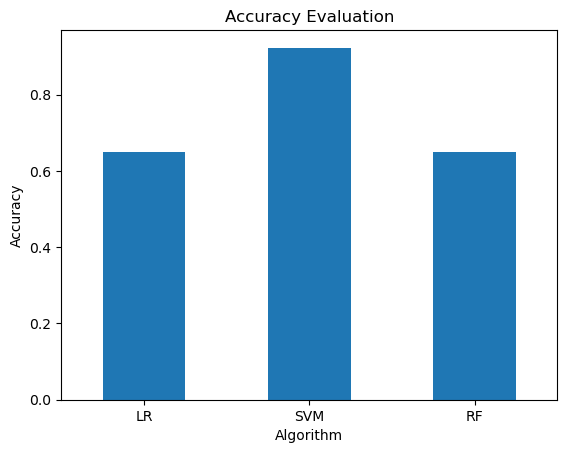

6.662914285714286
1.3056
1.0444


In [4]:
"""
Author: Alex Oachesu
Date: 15th Feb, 2024
"""

from sklearn.linear_model import SGDClassifier as LR
from sklearn.svm import SVC as SVM
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error as MSE

# ================================== I. DATA LOADING & PREPROCESSING ==================================
""" 
Fetch MNIST dataset from OpenML:
    - "mnist_784" - the MNIST dataset containing images into 28x28 (784) pixel images
    - version=1 - the version to fetch
    - return_X_y=True - return the feature (X - pixel value) and the target (y - label) as separate numpy arrays
    - parser="auto" - automatically choose an appropriate parser to fit the data format
"""
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, parser="auto")

"""
Split data into training (75%) and testing (25%) sets
"""
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

"""
Normalizing the feature's distribution using StandardScaler 
    - 'scaled_value = (x - mean) / std'
    - linear models are sensitive to feature scales
    - each feature -> mean = 0, and std = 1
"""
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# ================================== II. MODEL(S) DEFINITION ==================================
# Linear Regression (using SGDClassifier)
lr = LR(loss="epsilon_insensitive", max_iter=1000, tol=1e-3, random_state=42)

# Support Vector Machine with a linear kernel
svm = SVM(kernel="linear", random_state=42)

# Random Forest with a depth of 10
rf = RF(max_depth=10, random_state=42, n_jobs=-1)

# ================================== III. MODEL(S) TRAINING ==================================
lr.fit(X_train_normalized, y_train)
svm.fit(X_train_normalized, y_train)
rf.fit(X_train_normalized, y_train)

# ================================== IV. PERFORMANCE EVALUATION ==================================
# Generate predictions
lr_y_pred = lr.predict(X_test_normalized)
svm_y_pred = svm.predict(X_test_normalized)
rf_y_pred = rf.predict(X_test_normalized)

# Evaluate model accuracy
lr_acc = accuracy_score(y_test, lr_y_pred)
svm_acc = accuracy_score(y_test, svm_y_pred)
rf_acc = accuracy_score(y_test, lr_y_pred)

# Compute MSE
lr_mse = MSE(y_test.astype(float), lr_y_pred.astype(float))
svm_mse = MSE(y_test.astype(float), svm_y_pred.astype(float))
rf_mse = MSE(y_test.astype(float), rf_y_pred.astype(float))

# ================================== V. VISUALIZATION ==================================
print("Accuracy: ")
print(f"LR : {lr_acc}")
print(f"SVM: {svm_acc}")
print(f"RF : {rf_acc}")

# Accuracy dictionary ==================================
acc = {"LR": lr_acc, "SVM": svm_acc, "RF": rf_acc}
df_acc = pd.DataFrame.from_dict(acc, orient="index", columns=["Accuracy"])
print(df_acc)

# Plot (bar plot) the Linear Regression, SVM, and Random Forest models' accuracy
df_acc.plot(kind="bar", legend=False)
plt.title("Accuracy Evaluation")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.xticks(rotation=0)
plt.show()

print(lr_mse)
print(svm_mse)
print(rf_mse)

### 2. Visualize the MSE error against Epoch

Different colors for each algorithm. A legend should be on the top corner ("SVM", "LR", "RF")


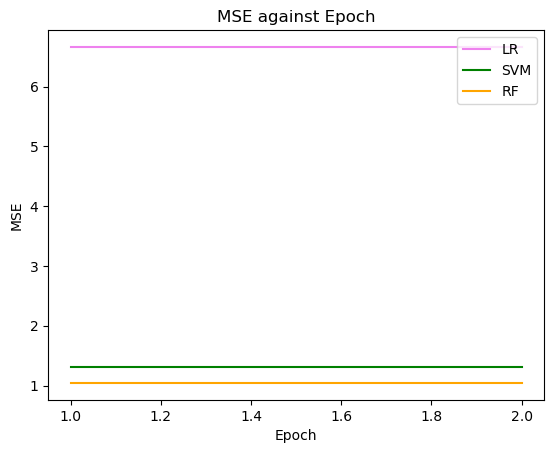

In [7]:
"""
Author: Alex Oachesu
Date: 15th Feb, 2024
"""

import numpy as np
from sklearn.linear_model import SGDClassifier as LR
from sklearn.svm import SVC as SVM
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

import numpy as np

import matplotlib.pyplot as plt

# ================================== I. DATA LOADING & PREPROCESSING ==================================
""" 
Fetch MNIST dataset from OpenML:
    - "mnist_784" - the MNIST dataset containing images into 28x28 (784) pixel images
    - version=1 - the version to fetch
    - return_X_y=True - return the feature (X - pixel value) and the target (y - label) as separate numpy arrays
    - parser="auto" - automatically choose an appropriate parser to fit the data format
"""
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, parser="auto")

"""
Split data into training (75%) and testing (25%) sets
"""
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

"""
Normalizing the feature's distribution using StandardScaler 
    - 'scaled_value = (x - mean) / std'
    - linear models are sensitive to feature scales
    - each feature -> mean = 0, and std = 1
"""
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# ================================== II. MODEL(S) DEFINITION ==================================
# Linear Regression (using SGDClassifier)
lr = LR(loss="epsilon_insensitive", max_iter=1000, tol=1e-3, random_state=42)

# Support Vector Machine with a linear kernel
svm = SVM(kernel="linear", random_state=42)

# Random Forest with a depth of 10
rf = RF(max_depth=10, random_state=42, n_jobs=-1)

# ================================== III. MODEL(S) TRAINING ==================================
# Define the number of epochs
epochs = 2  # Only two, because it takes ~10' each epoch!

# Train the models for a fixed number of epochs and store the MSE at each epoch
lr_MSE = []
svm_MSE = []
rf_MSE = []

for epoch in range(epochs):
    # Train the  models
    lr.fit(X_train_normalized, y_train)
    svm.fit(X_train_normalized, y_train)
    rf.fit(X_train_normalized, y_train)
    # ================================== IV. PERFORMANCE ANALYSIS ==================================

    # Generate predictions
    lr_y_pred = lr.predict(X_test_normalized)
    svm_y_pred = svm.predict(X_test_normalized)
    rf_y_pred = rf.predict(X_test_normalized)

    lr_MSE.append(MSE(y_test.astype(float), lr_y_pred.astype(float)))
    svm_MSE.append(MSE(y_test.astype(float), svm_y_pred.astype(float)))
    rf_MSE.append(MSE(y_test.astype(float), rf_y_pred.astype(float)))

# ================================== V. VISUALIZATION ==================================
# Visualize the training loss against epochs
plt.plot(range(1, epochs + 1), lr_MSE, label="LR", color="violet")
plt.plot(range(1, epochs + 1), svm_MSE, label="SVM", color="green")
plt.plot(range(1, epochs + 1), rf_MSE, label="RF", color="orange")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("MSE against Epoch")
plt.legend(loc="upper right")
plt.show()

## Task A.3.2: Predict the Rain! - IOT DATA (12 pts - Mandatory/Optional)

In this task, you have given the weather conditions of Seattle, Washington State, US. Given the assumption that the input data is a prediction of the next day's weather, you should predict the output, weather condition, of tomorrow

The input is the min./max. temperature, precipitation, and wind. Your task is to find out how the weather is going to be based on these parameters. There are 5 output classes: (1)drizzle, (2)rain, (3)sun, (4)snow, (5)fog

Import the dataset.

### I.

Use Linear regression, SVM (with Linear kernel), and Random Forest(with a maximum depth of less than 10) algorithms to classify the weather data in 5 output classes: "drizzle", "rain", "sun", "snow", "fog" (5 pts-Mandatory)


In [30]:
"""
Author: Alex Oachesu
Date: 15th Feb, 2024
"""

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC as SVM
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score

# ================================== I. DATA LOADING & PREPROCESSING ==================================
# Load the dataset
df = pd.read_csv("data/seattle-weather.csv")

# Encode the target variable with numerical values [0:4]
label_encoder = LabelEncoder()
df["weather_encoded"] = label_encoder.fit_transform(df["weather"])
print(df)

# Prepare features and target
X = df[["temp_max", "temp_min", "wind", "precipitation"]]
y = df["weather_encoded"]
df_weather_mapping = df[["weather", "weather_encoded"]]
print(df_weather_mapping.drop_duplicates())
#      weather  weather_encoded
# 0    drizzle                0
# 1       rain                2
# 7        sun                4
# 13      snow                3
# 192      fog                1

# Slit dataset into training / testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ================================== II. MODEL DEFINITION ==================================
lr = LR(max_iter=1000, tol=1e-3, random_state=42)
svm = SVM(kernel="linear")
rf = RF(max_depth=8, random_state=42)

# ================================== IV. MODEL TRAINING ==================================
# The results of the scaled data were inferior to the unscaled data, so I decided to continue with unscaled data
# Train Random Forest Classifier with a maximum depth of less than 10
lr.fit(X_train, y_train)
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)

# ================================== II. PERFORMANCE ANALYSIS ==================================
# Predictions
lr_pred = lr.predict(X_test)
svm_pred = svm.predict(X_test)
rf_pred = rf.predict(X_test)

# Evaluation
lr_accuracy = accuracy_score(y_test, lr_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

# ================================== V. VISUALIZATION ==================================
print("\nAccuracy:")
print(f"Logistic Regression: {lr_accuracy:.4f}")
print(f"Support Vector Machine: {svm_accuracy:.4f}")
print(f"Random Forest: {rf_accuracy:.4f}")

            date  precipitation  temp_max  temp_min  wind  weather  \
0     2012-01-01            0.0      12.8       5.0   4.7  drizzle   
1     2012-01-02           10.9      10.6       2.8   4.5     rain   
2     2012-01-03            0.8      11.7       7.2   2.3     rain   
3     2012-01-04           20.3      12.2       5.6   4.7     rain   
4     2012-01-05            1.3       8.9       2.8   6.1     rain   
...          ...            ...       ...       ...   ...      ...   
1456  2015-12-27            8.6       4.4       1.7   2.9     rain   
1457  2015-12-28            1.5       5.0       1.7   1.3     rain   
1458  2015-12-29            0.0       7.2       0.6   2.6      fog   
1459  2015-12-30            0.0       5.6      -1.0   3.4      sun   
1460  2015-12-31            0.0       5.6      -2.1   3.5      sun   

      weather_encoded  
0                   0  
1                   2  
2                   2  
3                   2  
4                   2  
...            

### II.

Visualize the MSE error against Epoch for 3 algorithms in one line plot, with different colors for each algorithm. A legend should be on the top corner ("SVM", "LR", "RF") (2 pts-Mandatory)


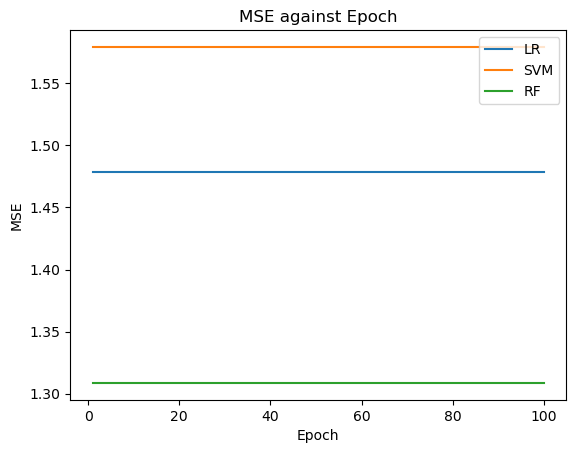

In [39]:
"""
Author: Alex Oachesu
Date: 15th Feb, 2024
"""

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# ============================== IV. RESULTS ANALYSIS ==============================
# II: Compute MSE and Visualize
epochs = 100
lr_mse = []
svm_mse = []
rf_mse = []

for epoch in range(epochs):

    # Train the models
    lr.fit(X_train_scaled, y_train)
    svm.fit(X_train_scaled, y_train)
    rf.fit(X_train_scaled, y_train)

    # Compute MSE for lr, svm, rf
    lr_mse.append(mean_squared_error(y_test, lr.predict(X_test_scaled)))
    svm_mse.append(mean_squared_error(y_test, svm.predict(X_test_scaled)))
    rf_mse.append(mean_squared_error(y_test, rf.predict(X_test_scaled)))

# ============================== V. VISUALIZATION ==============================
plt.plot(range(1, epochs + 1), lr_mse, label="LR")
plt.plot(range(1, epochs + 1), svm_mse, label="SVM")
plt.plot(range(1, epochs + 1), rf_mse, label="RF")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("MSE against Epoch")
plt.legend(loc="upper right")
plt.show()

### III.

Visualize the results of one of the algorithms (of your choice) with the Confusion Matrix. The matrix should be 5x5.


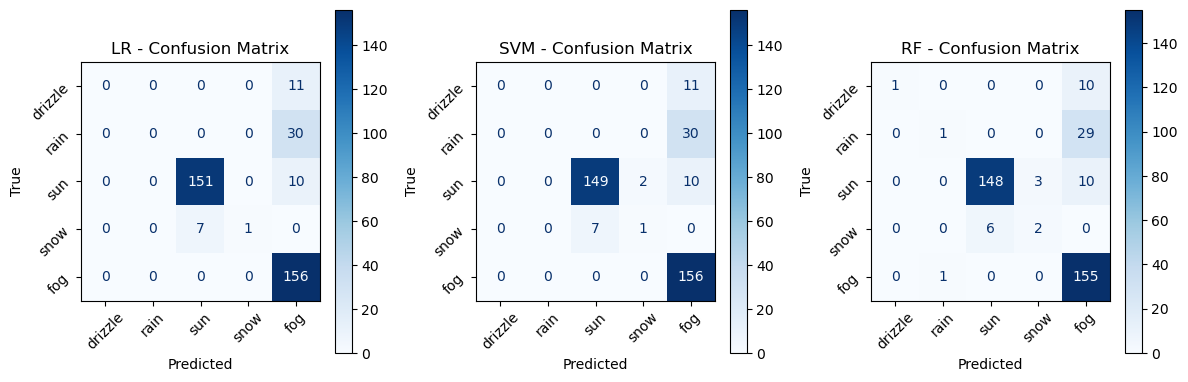

In [44]:
"""
Author: Alex Oachesu
Date: 15th Feb, 2024
"""

from sklearn.metrics import confusion_matrix as CM, ConfusionMatrixDisplay as CMD

# Define the list of weather categories
weather_categories = ["drizzle", "rain", "sun", "snow", "fog"]
models = [lr, svm, rf]

# Create a figure and axis objects
fig, axes = plt.subplots(1, len(models), figsize=(12, 4))


def plot_cm(ax, model):
    # Train the model
    model.fit(X_train, y_train)

    # Predict the labels using the designated model
    pred = model.predict(X_test)

    # Compute the confusion matrix
    cm = CM(y_test, pred, labels=range(len(weather_categories)))

    # Create a Confusion Matrix Display
    CMD(confusion_matrix=cm, display_labels=weather_categories).plot(
        cmap="Blues", values_format="d", ax=ax
    )
    ax.set_title(
        f"{'LR' if model == lr else 'SVM' if model == svm else 'RF'} - Confusion Matrix"
    )
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    ax.set_xticklabels(weather_categories, rotation=45)
    ax.set_yticklabels(weather_categories, rotation=45)


# Plot confusion matrices for each model
for i, model in enumerate(models):
    plot_cm(axes[i], model)

plt.tight_layout()
plt.show()

## Task A.3.3: Guess where did I GO! (Arduino Inertia) (5 pts - Optional)


In this task you will train a machine learning model to predict which direction the Arduino moves toward. This is just an example (and impractical!) way of predicting the direction of the Arduino, as it can be understood by looking at ACC_X, ACC_Y, and ACC_Z immediately. But lets do the hard work and do it with a simple ML algorithm!

**_Note #1:_** As a reminder, the accelerometer detects the acceleration or in other words changes in the speed. therefore your move should be fast and jerky to activate the sensor.

**_Note #2:_** As the population of the dataset is very small, PAY ATTENTION to labeling the data "left" or "right" correctly. Double-check your labeling as one wrong label can result in a malfunction of your ML algorithm.

### I.

Collect 40 data records with low frequency (100Hz) and duration of 1 second each, in which in 20 of them you move the Arduino Right ->, and in another 20 you move the Arduino Left <-. The process can be done with an Arduino IDE script or through the EdgeImpulse website. (2pts Optional)

Export the data as JSON. Use the script here to transform them to CSV, or import them to Python with a script like below. Note that each data is a time series array and not a single variable.

```
def load_json_data(json_files):
    data = []
    for file in json_files:
        with open(file, 'r') as f:
            json_data = json.load(f)
            # Assuming JSON data is in the form of a time-series array
            data.append(json_data)
    return data
```


In [94]:
"""
Author: Alex Oachesu
Date: 15th Feb, 2024
"""

import os
import cbor2
import pandas as pd
import numpy as np
import json


def parse_cbor_file(file_path):
    with open(file_path, "rb") as f:
        data = cbor2.load(f)
    # Extract the 'values' from the payload
    values = data["payload"]["values"]
    return values


def process_directory(root_dir, dataset_type):
    dataset_dir = os.path.join(root_dir, dataset_type)
    data = []
    for filename in os.listdir(dataset_dir):
        if filename.endswith(".cbor"):
            file_path = os.path.join(dataset_dir, filename)
            label = "left" if "left" in filename else "right"
            features = parse_cbor_file(file_path)
            data.append((features, label))
    return data


def create_csv(root_dir, output_file):
    training_data = process_directory(root_dir, "training")
    testing_data = process_directory(root_dir, "testing")

    training_df = pd.DataFrame(training_data, columns=["features", "label"])
    testing_df = pd.DataFrame(testing_data, columns=["features", "label"])

    training_df.to_csv(
        os.path.join(root_dir, output_file.format("training")),
        index=False,
    )
    testing_df.to_csv(
        os.path.join(root_dir, output_file.format("testing")), index=False
    )


if __name__ == "__main__":
    root_directory = "./data/a.3.3.-export"
    output_file_template = "A.3.3_{}_data.csv"
    create_csv(root_directory, output_file_template)

    # Merge the training and the testing datasets into one
    df1 = pd.read_csv("./data/a.3.3.-export/A.3.3_testing_data.csv")
    df2 = pd.read_csv("./data/a.3.3.-export/A.3.3_training_data.csv")
    merged_df = pd.concat([df1, df2], ignore_index=True)
    merged_df.to_csv("./data/a.3.3-data.csv", index=False)

    df_a33 = pd.read_csv("./data/a.3.3-data.csv")
    print("Arduino generated data:")
    print(df_a33.head())

Arduino generated data:
                                            features  label
0  [[-1.2533645629882812, 0.28072014451026917, 9....   left
1  [[-1.0732009410858154, 2.63362193107605, 9.331...  right
2  [[-3.3632547855377197, 2.100313425064087, 8.91...  right
3  [[-3.514688014984131, -1.3126211166381836, 9.3...   left
4  [[-1.7375918626785278, -3.663727045059204, 8.6...   left


### II.

Write a linear regression ML code with the five steps described in the instruction above, specified, to guess the label of the data. "left" or "right". (3pts Optional)


/var/folders/xs/hb6fwm8j38qbb3z21p6821lw0000gn/T/ipykernel_99126/3382557798.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["label_encoded"] = label_encoder.fit_transform(df["label"])


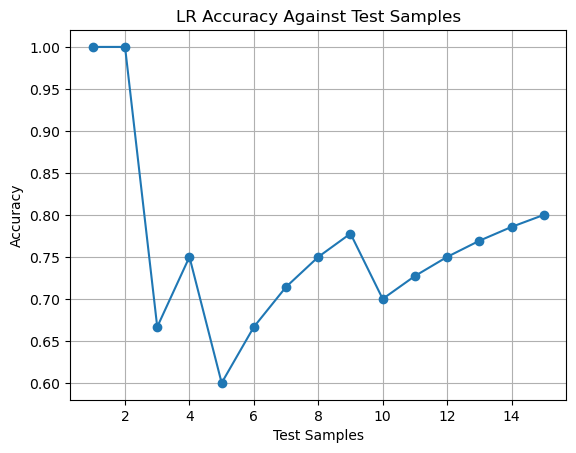

Test mean accuracy: 0.7638
Accuracy: 0.8000


In [109]:
"""
Author: Alex Oachesu
Date: 15th Feb, 2024
"""

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# ============================== I. LOAD DATASET & PRE-PROCESSING ==============================
df = pd.read_csv("./data/a.3.3-data.csv")

# Convert string representations of arrays to array datatype
df["features"] = df["features"].apply(lambda x: np.array(eval(x)))


# Traverse the dataframe and expand feature containing arrays-of-arrays of floating numbers (60x6 * rows(60))
# into separate columns for each floating number
def expand_features(row):
    for i, feature_array in enumerate(row["features"]):
        for j, value in enumerate(feature_array):
            row[f"feature_{i+1}_{j+1}"] = value
    return row


# Expand each array-of-arrays of floats feature colum to unique float feature columns
df = df.apply(expand_features, axis=1)
# Drop the original "features" column
df.drop(columns=["features"], inplace=True)

# ============================== II. MODEL DEFINITION ==============================
lr = LinearRegression()

# ============================== III. MODEL TRAINING ==============================
# Encode the target variable with numerical values [0:4]
label_encoder = LabelEncoder()
df["label_encoded"] = label_encoder.fit_transform(df["label"])

# Split the Datasets
X = df.drop(columns=["label", "label_encoded"])  # Keep the feature columns
y = df["label_encoded"]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Lists to store accuracy values and corresponding test samples
accuracy_values = []
test_samples = []

# Train the model and evaluate each test sample
for i in range(1, len(X_test) + 1):
    X_test_partial = X_test[:i]
    y_test_partial = y_test[:i]

    # Train
    lr.fit(X_train, y_train)

    # Predict
    lr_pred = lr.predict(X_test_partial)
    lr_pred_class = np.round(lr_pred).astype(int)

    # ============================== IV. RESULT ANALYSIS ==============================
    # Calculate accuracy
    accuracy = accuracy_score(y_test_partial, lr_pred_class)

    # Append accuracy and corresponding test sample size to lists
    accuracy_values.append(accuracy)
    test_samples.append(i)

# ============================== V. VISUALIZATION ==============================
# Plot accuracy against test samples
plt.plot(test_samples, accuracy_values, marker="o")
plt.title("LR Accuracy Against Test Samples")
plt.xlabel("Test Samples")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

print(f"Test mean accuracy: {np.mean(accuracy_values):.4f}")
print(f"Accuracy: {accuracy_values[len(accuracy_values) - 1]:.4f}")

## Task A.3.4: Classify the Pinguins (Unsupervised) (5 pts - Optional)


This dataset is the classification of 3 types of penguins based on the length of their bill (or beak).

**_Here, you should build a K-means clustering model and evaluate your model in terms of accuracy._**

1. Load the dataset of Pinguins: penguins.csv
   We only need 3 columns of the dataset: "species", "bill_length_mm", and "bill_depth_mm". the data distribution is shown in the below figure.

<img src="../preparation/img/penguins.png" style="width: 600px">

2. Build a K-means clustering model to cluster the penguins' types based on "bill_length_mm" and "bill_depth_mm". Visualize the clusters in an XY plane, like the figure below but with the result of your mode. Put the "centroids" of each cluster in the figure.
3. Evaluate the model and find the accuracy of your model


  species  bill_length_mm  bill_depth_mm
0  Adelie            39.1           18.7
1  Adelie            39.5           17.4
2  Adelie            40.3           18.0
4  Adelie            36.7           19.3
5  Adelie            39.3           20.6


/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/xs/hb6fwm8j38qbb3z21p6821lw0000gn/T/ipykernel_99126/2454728215.py:51: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


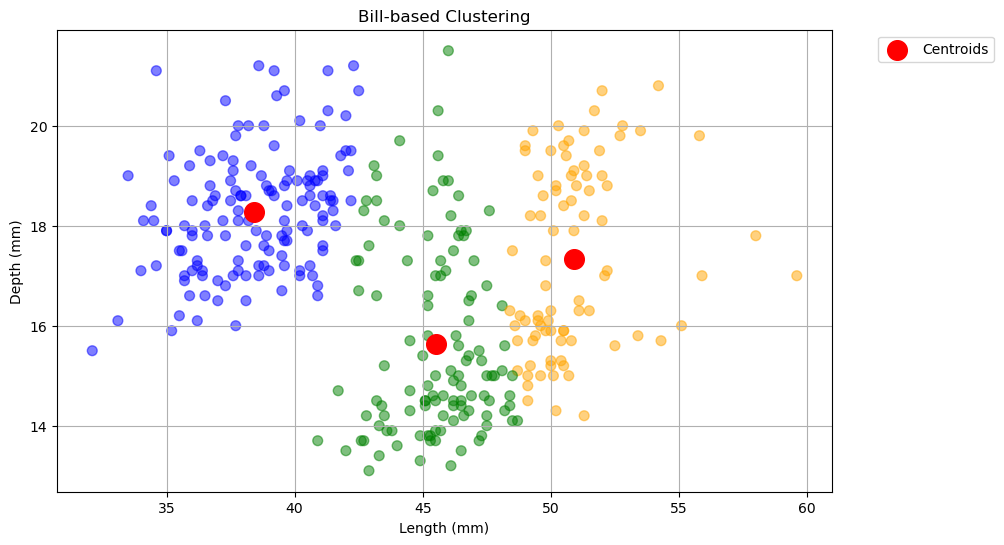

Confusion MAtrix Accuracy: 0.2310


In [108]:
"""
Author: Alex Oachesu
Date: 15th Feb, 2024
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import adjusted_rand_score


# ============================== I. LOAD DATASET & PRE-PROCESSING ==============================
df = pd.read_csv(
    "./data/penguins.csv", usecols=["species", "bill_length_mm", "bill_depth_mm"]
)
# Remove rows with NaN values
df.dropna(inplace=True)

print(df.head())
# Encode the target column "species" with numerical values
label_encoder = LabelEncoder()
df["species_encoded"] = label_encoder.fit_transform(df["species"])

# ============================== II. MODEL DEFINITION ==============================
# There are 3 clusters: Adelie, Chinstrap, Gentoo
clusters = 3
# K-means clustering model
k_means = KMeans(n_clusters=clusters, random_state=42)

# ============================== III. MODEL TRAINING ==============================
# Extract features for clustering
X = df[["bill_length_mm", "bill_depth_mm"]]
# Train unsupervised K-Means - unlabeled data
k_means.fit(X)

# ============================== IV. RESULT ANALYSIS ==============================
# Get cluster labels
cluster_labels = k_means.labels_

# Get cluster centroids
cluster_centers = k_means.cluster_centers_

# ============================== V. VISUALIZATION ==============================
plt.figure(figsize=(10, 6))
cluster_colors = ["orange", "blue", "green"]

# DAta
plt.scatter(
    X["bill_length_mm"],
    X["bill_depth_mm"],
    c=[cluster_colors[label] for label in cluster_labels],
    cmap="magma",
    s=50,
    alpha=0.5,
)

# Centroids
plt.scatter(
    cluster_centers[:, 0],
    cluster_centers[:, 1],
    c="red",
    s=200,
    marker="o",
    label="Centroids",
)

plt.xlabel("Length (mm)")
plt.ylabel("Depth (mm)")
plt.title("Bill-based Clustering")
# Move the legend outside the plot but inside the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()

# Compute confusion matrix - used to evaluate classification models performance
# Compare the true species labels with the one predicted - not sure it is relevant
conf_matrix = confusion_matrix(df["species_encoded"], cluster_labels)

# Calculate accuracy as the normalized sum of diagonal elements of the confusion matrix
# np.diag - the true Trues
# np.sum - total samples
acc = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)
print(f"Confusion MAtrix Accuracy: {acc:.4f}")